Давайте практиковаться в применении статистических критериев.

Представим, что у нас был процесс обзвона клиентов с предложением продлить подписку на наше приложение. Вероятность успеха составляла p=0.1 (каждый десятый звонок заканчивался продлением подписки).

Мы сделали новый алгоритм подбора клиентов для обзвона. Из 1000 тестовых звонков 113 закончились успешно.

Мы хотим проверить, значимо ли это отклонение от бейзлайна в 10%. Посчитайте p-value для нулевой гипотезы о равенстве доли p=0.1, альтернатива двусторонняя. Попробуйте сделать это вручную, без использования готовых библиотек (то есть используем модули про распределения, но не готовый статистический критерий). Учтите, что каждый звонок — распределение Бернулли и всё можно сделать точно и без использования центральной предельной теоремы.

Будьте осторожны — если вы будете вспоминать, как мы это делали на уроке, то осторожней с тем, какие квантили вы считаете (левый или правый хвост экстремальных значений). Для удобства можно визуализировать.

В конце попробуйте воспользоваться библиотечной версией и сравните результаты. Они должны получиться похожими, выбирайте библиотечную версию. В разборе домашнего задания будем изучать, в чём разница.

In [1]:
from scipy.stats import norm

successes = 113
total_calls = 1000
p_expected = 0.1

p_sample = successes / total_calls

z_stat = (p_sample - p_expected) / ((p_expected * (1 - p_expected) / total_calls) ** 0.5)

p_value = 2 * (1 - norm.cdf(abs(z_stat)))

print("Z-статистика:", z_stat)
print("p-value:", p_value)


Z-статистика: 1.3703203194062974
p-value: 0.17058693287144155


Теперь попробуем применить вручную t-критерий Стьюдента.

Представим, что мы проверяем, изменилась ли средняя температура в нашем городе. Мы провели 100 замеров в разное время суток и разных местах, получили среднее значение, равное 18.1 градусам, среднеквадратичное отклонение, оценённое по выборке, 8.2 градуса. Хотим проверить, изменилась ли средняя температура, если ранее она составляла 16.5 градусов.

Посчитайте p-value для t-критерия Стьюдента, альтернатива двусторонняя.

In [2]:

from scipy.stats import t

mean = 18.1
std = 8.2
t_last = 16.5
total = 100

t_val = (mean - t_last)/(std/(total**0.5))

In [3]:
p_value = 2 * (1 - t.cdf(abs(t_val), df=total-1))

print("t-статистика:", t_val)
print("p-value:", p_value)

t-статистика: 1.951219512195124
p-value: 0.05385741608695005


In [4]:
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing(as_frame=True, return_X_y=True)
df, target = data[0], data[1] 

In [5]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [6]:
target

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20640, dtype: float64

In [7]:
import pandas as pd

df_wt = pd.concat([df, target], axis=1)

In [8]:
income_district_1 = df_wt[df_wt["HouseAge"] <= 30]
income_district_2 = df_wt[df_wt["HouseAge"] > 30]

In [9]:
from scipy.stats import ttest_ind
import numpy as np

# Вычисляем средние значения и стандартные отклонения
mean_income_1 = np.mean(income_district_1)
mean_income_2 = np.mean(income_district_2)
std_dev_1 = np.std(income_district_1, ddof=1)  # ddof=1 для несмещенной оценки стандартного отклонения
std_dev_2 = np.std(income_district_2, ddof=1)

# Выполняем t-тест для независимых выборок
t_statistic, p_value = ttest_ind(income_district_1, income_district_2, equal_var=False)

print("Средний доход в первом районе:", mean_income_1)
print("Средний доход во втором районе:", mean_income_2)
print("t-статистика:", t_statistic)
print("p-value:", p_value)


Средний доход в первом районе: 181.34933137477938
Средний доход во втором районе: 121.82892959827048
t-статистика: [  12.83259006 -218.73022204   18.42207592   10.17407137   38.12835679
   -2.03928163    5.08642931    6.13108002  -10.16820313]
p-value: [1.51065432e-037 0.00000000e+000 3.50714471e-075 2.95525463e-024
 6.55936640e-305 4.14491893e-002 3.68072965e-007 8.88979420e-010
 3.16932852e-024]


C:\Users\Vica\AppData\Roaming\Python\Python311\site-packages\numpy\core\fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


Давайте проверим, а с какими данными мы работаем.  Хорошо бы делать это до применения критериев!

Во-первых, давайте посмотрим на гистограмму распределения.

Во-вторых, попробуйте построить qq-plot для наших выборок, оцените нормальность. Воспользуйтесь также тестом Шапиро-Уилка.

Что вы можете сказать?

Внимание, sm.qqplot не приводит вашу выборку к стандартной нормальной. Вам нужно самим нормализовать выборку так, чтобы среднее было нулевым, а дисперсия единичной. Тогда график будет информативным и можно будет сравнивать с диагональным.

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

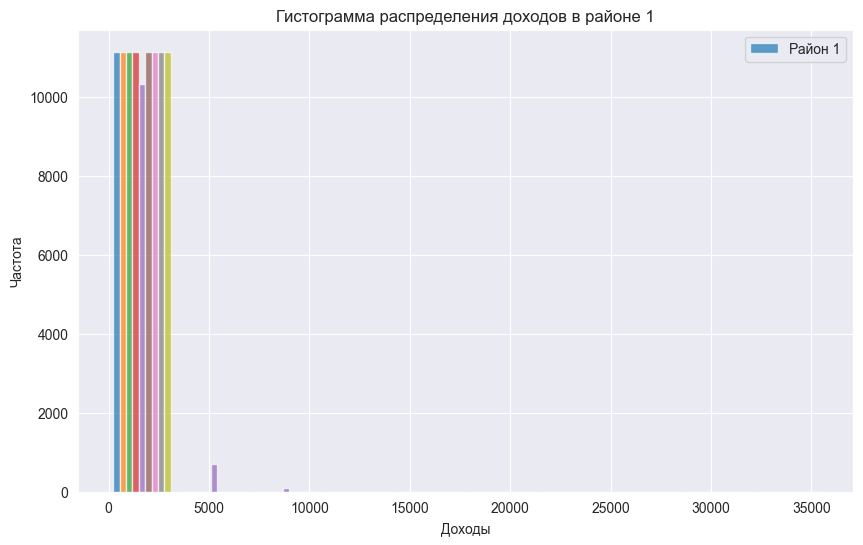

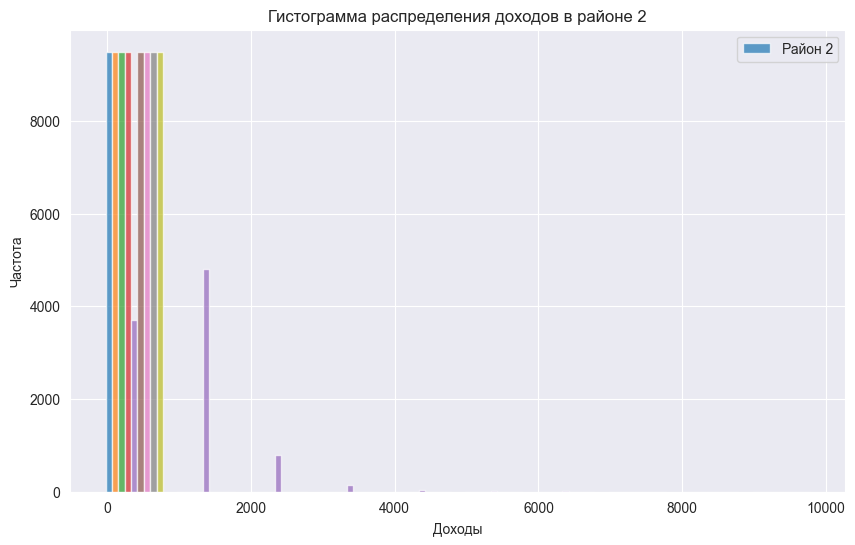

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.hist(income_district_1, alpha=0.7, label='Район 1')
plt.xlabel('Доходы')
plt.ylabel('Частота')
plt.title('Гистограмма распределения доходов в районе 1')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(income_district_2, alpha=0.7, label='Район 2')
plt.xlabel('Доходы')
plt.ylabel('Частота')
plt.title('Гистограмма распределения доходов в районе 2')
plt.legend()
plt.show()

In [11]:
income_district_1['HouseAge']

1        21.0
50       21.0
59        2.0
70       26.0
74       20.0
         ... 
20635    25.0
20636    18.0
20637    17.0
20638    18.0
20639    16.0
Name: HouseAge, Length: 11145, dtype: float64

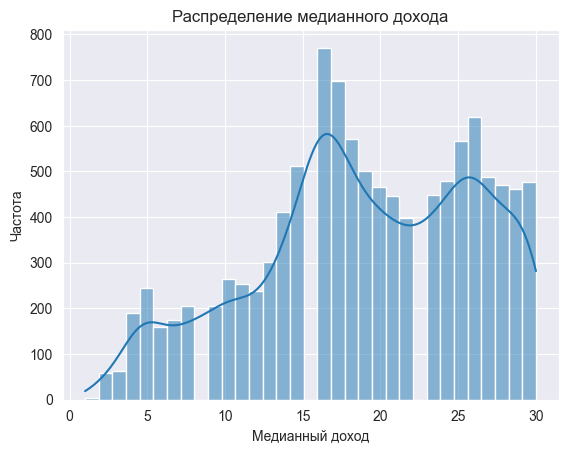

In [13]:
sns.histplot(income_district_1['HouseAge'], kde=True)  
plt.title('Распределение медианного дохода')
plt.xlabel('Медианный доход')
plt.ylabel('Частота')
plt.show()

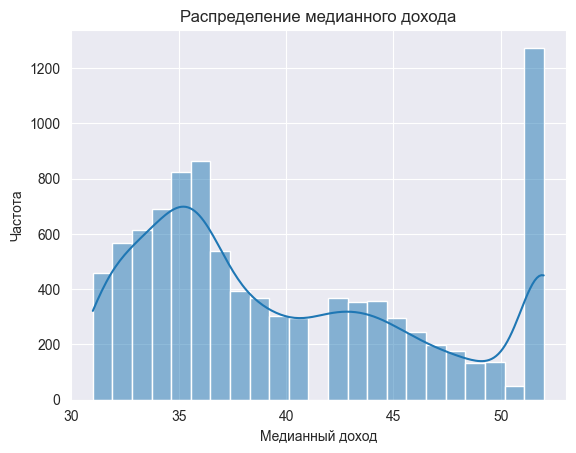

In [14]:
sns.histplot(income_district_2['HouseAge'], kde=True)  
plt.title('Распределение медианного дохода')
plt.xlabel('Медианный доход')
plt.ylabel('Частота')
plt.show()

C:\Users\Vica\AppData\Roaming\Python\Python311\site-packages\numpy\core\fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)
C:\Program Files\Python311\Lib\site-packages\statsmodels\graphics\gofplots.py:1043: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


<Figure size 800x600 with 0 Axes>

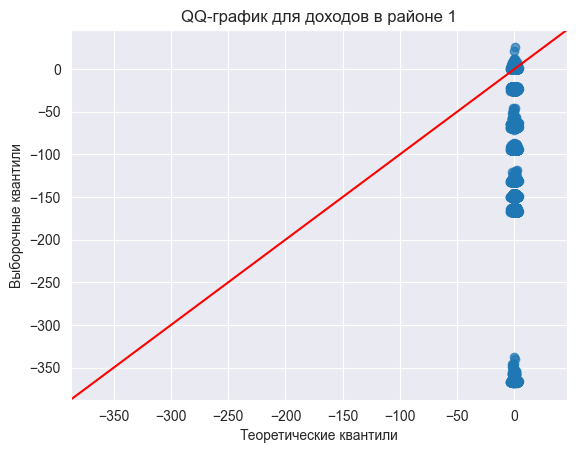

<Figure size 800x600 with 0 Axes>

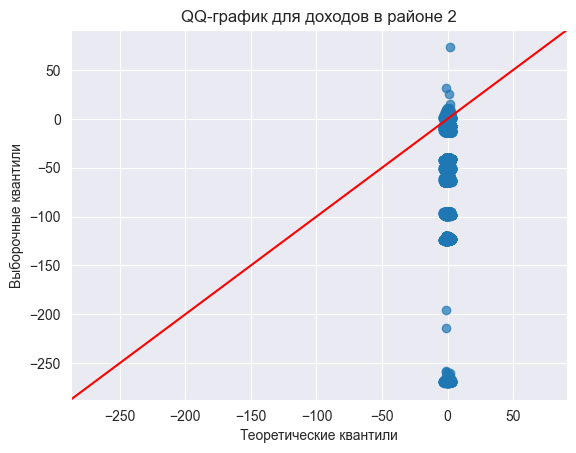

Тест Шапиро-Уилка для района 1:
Статистика теста: 0.820665717124939
p-value: 0.0

Тест Шапиро-Уилка для района 2:
Статистика теста: 0.7816091775894165
p-value: 0.0


C:\Program Files\Python311\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [16]:
import statsmodels.api as sm
from scipy.stats import shapiro

# Функция для нормализации выборки
def normalize(sample):
    sample_mean = np.mean(sample)
    sample_std = np.std(sample, ddof=1)
    return (sample - sample_mean) / sample_std

# Нормализация выборок
norm_income_district_1 = normalize(income_district_1)
norm_income_district_2 = normalize(income_district_2)

# Построение qq-графика для района 1
plt.figure(figsize=(8, 6))
sm.qqplot(norm_income_district_1, line='45', color='blue', alpha=0.7)
plt.title('QQ-график для доходов в районе 1')
plt.xlabel('Теоретические квантили')
plt.ylabel('Выборочные квантили')
plt.show()

# Построение qq-графика для района 2
plt.figure(figsize=(8, 6))
sm.qqplot(norm_income_district_2, line='45', color='green', alpha=0.7)
plt.title('QQ-график для доходов в районе 2')
plt.xlabel('Теоретические квантили')
plt.ylabel('Выборочные квантили')
plt.show()

# Применение теста Шапиро-Уилка для района 1
shapiro_stat_1, shapiro_p_value_1 = shapiro(norm_income_district_1)
print("Тест Шапиро-Уилка для района 1:")
print("Статистика теста:", shapiro_stat_1)
print("p-value:", shapiro_p_value_1)

# Применение теста Шапиро-Уилка для района 2
shapiro_stat_2, shapiro_p_value_2 = shapiro(norm_income_district_2)
print("\nТест Шапиро-Уилка для района 2:")
print("Статистика теста:", shapiro_stat_2)
print("p-value:", shapiro_p_value_2)

C:\Users\Vica\AppData\Roaming\Python\Python311\site-packages\pandas\core\internals\blocks.py:366: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


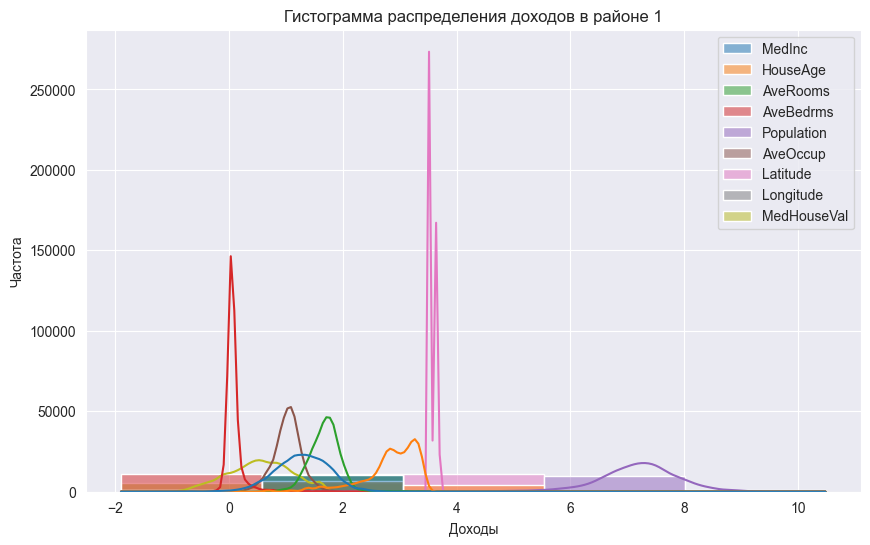

C:\Users\Vica\AppData\Roaming\Python\Python311\site-packages\pandas\core\internals\blocks.py:366: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


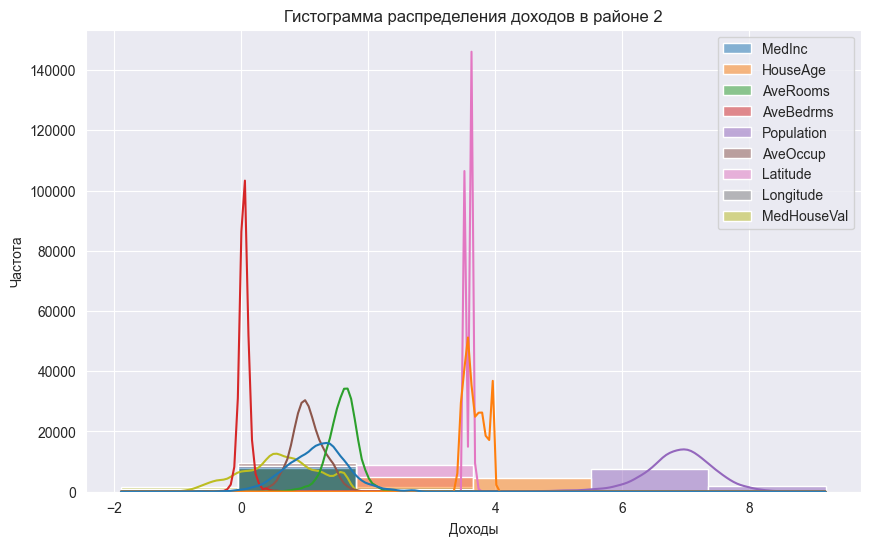

In [23]:
import seaborn as sns

# Построение гистограммы для района 1
plt.figure(figsize=(10, 6))
sns.histplot(income_district_1, bins=5, color='blue', kde=True)
plt.xlabel('Доходы')
plt.ylabel('Частота')
plt.title('Гистограмма распределения доходов в районе 1')
plt.show()

# Построение гистограммы для района 2
plt.figure(figsize=(10, 6))
sns.histplot(income_district_2, bins=6, color='green', kde=True)
plt.xlabel('Доходы')
plt.ylabel('Частота')
plt.title('Гистограмма распределения доходов в районе 2')
plt.show()


C:\Users\Vica\AppData\Roaming\Python\Python311\site-packages\pandas\core\internals\blocks.py:366: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)
C:\Users\Vica\AppData\Roaming\Python\Python311\site-packages\numpy\core\fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)
C:\Program Files\Python311\Lib\site-packages\statsmodels\graphics\gofplots.py:1043: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


<Figure size 800x600 with 0 Axes>

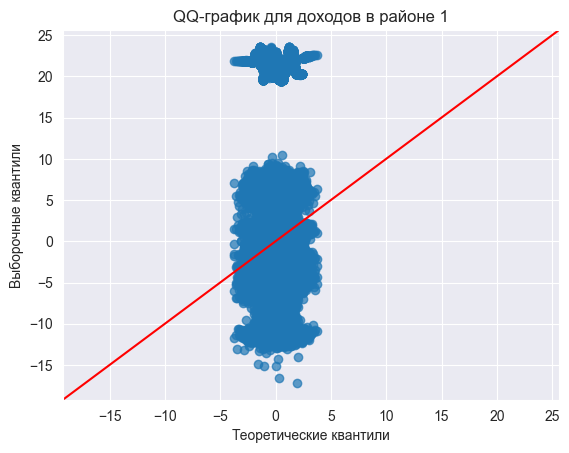

<Figure size 800x600 with 0 Axes>

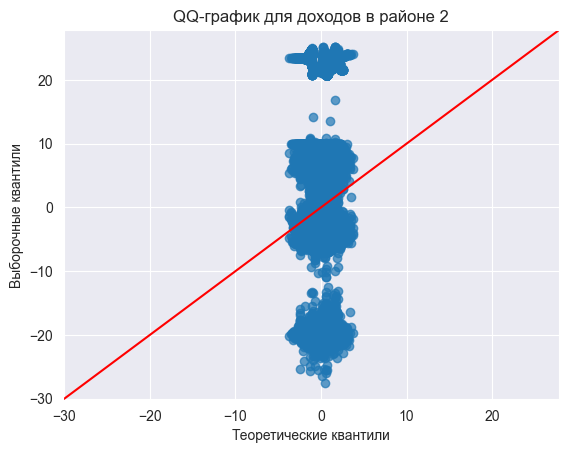

Тест Шапиро-Уилка для района 1:
Статистика теста: nan
p-value: 1.0

Тест Шапиро-Уилка для района 2:
Статистика теста: nan
p-value: 1.0


C:\Program Files\Python311\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [22]:
import scipy.stats as stats


def normalize(sample):
    sample_mean = np.mean(sample)
    sample_std = np.std(sample, ddof=1)
    return (sample - sample_mean) / sample_std


norm_income_district_1 = normalize(income_district_1)
norm_income_district_2 = normalize(income_district_2)

plt.figure(figsize=(8, 6))
sm.qqplot(norm_income_district_1, line='45', color='blue', alpha=0.7)
plt.title('QQ-график для доходов в районе 1')
plt.xlabel('Теоретические квантили')
plt.ylabel('Выборочные квантили')
plt.show()

plt.figure(figsize=(8, 6))
sm.qqplot(norm_income_district_2, line='45', color='green', alpha=0.7)
plt.title('QQ-график для доходов в районе 2')
plt.xlabel('Теоретические квантили')
plt.ylabel('Выборочные квантили')
plt.show()

# Применение теста Шапиро-Уилка для района 1
shapiro_stat_1, shapiro_p_value_1 = stats.shapiro(norm_income_district_1)
print("Тест Шапиро-Уилка для района 1:")
print("Статистика теста:", shapiro_stat_1)
print("p-value:", shapiro_p_value_1)

# Применение теста Шапиро-Уилка для района 2
shapiro_stat_2, shapiro_p_value_2 = stats.shapiro(norm_income_district_2)
print("\nТест Шапиро-Уилка для района 2:")
print("Статистика теста:", shapiro_stat_2)
print("p-value:", shapiro_p_value_2)


C:\Users\Vica\AppData\Roaming\Python\Python311\site-packages\pandas\core\internals\blocks.py:366: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)
C:\Users\Vica\AppData\Roaming\Python\Python311\site-packages\numpy\core\fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)
C:\Program Files\Python311\Lib\site-packages\statsmodels\graphics\gofplots.py:1043: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


<Figure size 800x600 with 0 Axes>

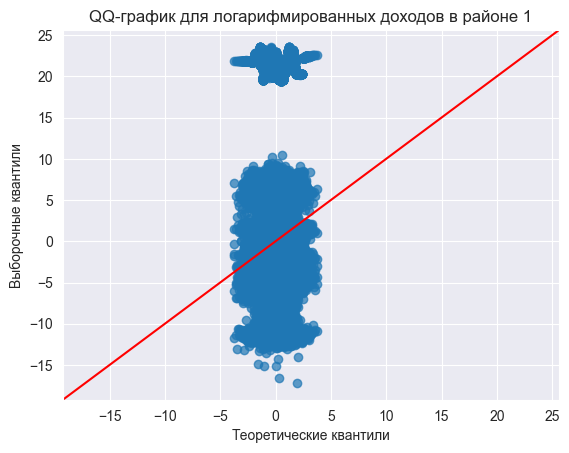

<Figure size 800x600 with 0 Axes>

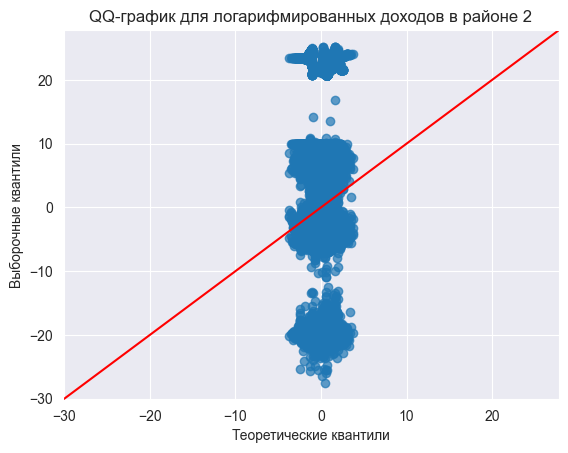

Тест Шапиро-Уилка для логарифмированных доходов в районе 1:
Статистика теста: nan
p-value: 1.0

Тест Шапиро-Уилка для логарифмированных доходов в районе 2:
Статистика теста: nan
p-value: 1.0


C:\Program Files\Python311\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [24]:
# Прологарифмируем данные о доходах
log_income_district_1 = np.log(income_district_1)
log_income_district_2 = np.log(income_district_2)

# Нормализуем логарифмированные выборки
norm_log_income_district_1 = normalize(log_income_district_1)
norm_log_income_district_2 = normalize(log_income_district_2)

# Построение qq-графика для логарифмированных доходов в районе 1
plt.figure(figsize=(8, 6))
sm.qqplot(norm_log_income_district_1, line='45', color='blue', alpha=0.7)
plt.title('QQ-график для логарифмированных доходов в районе 1')
plt.xlabel('Теоретические квантили')
plt.ylabel('Выборочные квантили')
plt.show()

# Построение qq-графика для логарифмированных доходов в районе 2
plt.figure(figsize=(8, 6))
sm.qqplot(norm_log_income_district_2, line='45', color='green', alpha=0.7)
plt.title('QQ-график для логарифмированных доходов в районе 2')
plt.xlabel('Теоретические квантили')
plt.ylabel('Выборочные квантили')
plt.show()

# Применение теста Шапиро-Уилка для логарифмированных доходов в районе 1
shapiro_stat_log_1, shapiro_p_value_log_1 = stats.shapiro(norm_log_income_district_1)
print("Тест Шапиро-Уилка для логарифмированных доходов в районе 1:")
print("Статистика теста:", shapiro_stat_log_1)
print("p-value:", shapiro_p_value_log_1)

# Применение теста Шапиро-Уилка для логарифмированных доходов в районе 2
shapiro_stat_log_2, shapiro_p_value_log_2 = stats.shapiro(norm_log_income_district_2)
print("\nТест Шапиро-Уилка для логарифмированных доходов в районе 2:")
print("Статистика теста:", shapiro_stat_log_2)
print("p-value:", shapiro_p_value_log_2)
